In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
import time
import zipfile

In [ ]:
# debugging 

# import pdb; pdb.set_trace()
# c means continue
# n means n
# can type in variable names


# getting land value data

source_pathlist = Path("data/land_value_data").glob("**/*.csv")
pathlist = sorted(source_pathlist, reverse=True)
land_value_df = pd.concat([pd.read_csv(path, encoding = "ISO-8859-1") for path in pathlist])
land_value_df.to_csv("land_value_data_combined.csv")

In [31]:
# opening zip file
zf = zipfile.ZipFile(Path("data/LV_20170801.zip"))
pd.read_csv(zf.open(zf.namelist()[0]))

,DISTRICT CODE,DISTRICT NAME,PROPERTY ID,PROPERTY TYPE,PROPERTY NAME,UNIT NUMBER,HOUSE NUMBER,STREET NAME,SUBURB NAME,POSTCODE,...,BASIS 3,BASE DATE 4,LAND VALUE 4,AUTHORITY 4,BASIS 4,BASE DATE 5,LAND VALUE 5,AUTHORITY 5,BASIS 5,Unnamed: 34
0,1,CESSNOCK,3017030,NORMAL,NaN,NaN,25,ECHIDNA CL,BELLBIRD,2325,...,6A(1),01/07/2013,251000.0,14A(1),6A(1),01/07/2012,239000.0,14A(1),6A(1),NaN
1,1,CESSNOCK,3017031,NORMAL,NaN,NaN,27,ECHIDNA CL,BELLBIRD,2325,...,6A(1),01/07/2013,251000.0,14A(1),6A(1),01/07/2012,239000.0,14A(1),6A(1),NaN
2,1,CESSNOCK,3017032,NORMAL,NaN,NaN,41,ECHIDNA CL,BELLBIRD,2325,...,6A(1),01/07/2013,251000.0,14A(1),6A(1),01/07/2012,239000.0,14A(1),6A(1),NaN
3,1,CESSNOCK,3017033,NORMAL,NaN,NaN,43,ECHIDNA CL,BELLBIRD,2325,...,6A(1),01/07/2013,251000.0,14A(1),6A(1),01/07/2012,239000.0,14A(1),6A(1),NaN
4,1,CESSNOCK,3017034,NORMAL,NaN,NaN,45,ECHIDNA CL,BELLBIRD,2325,...,6A(1),01/07/2013,242000.0,14A(1),6A(1),01/07/2012,230000.0,14A(1),6A(1),NaN
5,1,CESSNOCK,3017035,NORMAL,NaN,NaN,47,ECHIDNA CL,BELLBIRD,2325,...,6A(1),01/07/2013,242000.0,14A(1),6A(1),01/07/2012,230000.0,14A(1),6A(1),NaN
6,1,CESSNOCK,3017036,NORMAL,NaN,NaN,49,ECHIDNA CL,BELLBIRD,2325,...,6A(1),01/07/2013,242000.0,14A(1),6A(1),01/07/2012,230000.0,14A(1),6A(1),NaN
7,1,CESSNOCK,3017037,NORMAL,NaN,NaN,51,ECHIDNA CL,BELLBIRD,2325,...,6A(1),01/07/2013,236000.0,14A(1),6A(1),01/07/2012,225000.0,14A(1),6A(1),NaN
8,1,CESSNOCK,3017038,NORMAL,NaN,NaN,53,ECHIDNA CL,BELLBIRD,2325,...,6A(1),01/07/2013,236000.0,14A(1),6A(1),01/07/2012,225000.0,14A(1),6A(1),NaN
9,1,CESSNOCK,3017019,NORMAL,NaN,NaN,3,ECHIDNA CL,BELLBIRD,2325,...,6A(1),01/07/2013,225000.0,14A(1),6A(1),01/07/2012,214000.0,14A(1),6A(1),NaN


In [11]:
start_time = time.time()

land_value_df = pd.read_csv(Path("data/land_value_data_combined.csv"))

elapsed_time = time.time() - start_time
elapsed_time


C:\Users\elija\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


33.94934058189392

In [95]:
sorted(land_value_df["SUBURB NAME"].unique())

['AARONS PASS',
 'ABBOTSBURY',
 'ABBOTSFORD',
 'ABERCROMBIE',
 'ABERCROMBIE RIVER',
 'ABERDARE',
 'ABERDEEN',
 'ABERFOYLE',
 'ABERGLASSLYN',
 'ABERMAIN',
 'ABERNETHY',
 'ABINGTON',
 'ACACIA CREEK',
 'ACACIA GARDENS',
 'ADAMINABY',
 'ADAMSTOWN',
 'ADAMSTOWN HEIGHTS',
 'ADELONG',
 'ADJUNGBILLY',
 'AFTERLEE',
 'AGNES BANKS',
 'AIRDS',
 'AKOLELE',
 'ALBERT',
 'ALBION PARK',
 'ALBION PARK RAIL',
 'ALBURY',
 'ALDAVILLA',
 'ALECTOWN',
 'ALEXANDRIA',
 'ALFORDS POINT',
 'ALFREDTOWN',
 'ALICE',
 'ALISON',
 'ALLAMBIE HEIGHTS',
 'ALLANDALE',
 'ALLAWAH',
 'ALLEENA',
 'ALLGOMERA',
 'ALLWORTH',
 'ALLYNBROOK',
 'ALMA PARK',
 'ALPINE',
 'ALSTONVALE',
 'ALSTONVILLE',
 'ALUMY CREEK',
 'AMAROO',
 'AMBARVALE',
 'AMOSFIELD',
 'ANABRANCH NORTH',
 'ANABRANCH SOUTH',
 'ANAMBAH',
 'ANDO',
 'ANEMBO',
 'ANGLEDALE',
 'ANGLEDOOL',
 'ANGLERS REACH',
 'ANGOURIE',
 'ANNA BAY',
 'ANNANDALE',
 'ANNANGROVE',
 'APPIN',
 'APPLE TREE FLAT',
 'APPLEBY',
 'APPLETREE FLAT',
 'APSLEY',
 'ARABLE',
 'ARAKOON',
 'ARALUEN',
 'ARATU

In [13]:
# sample
land_value_df.sample(3)

,Unnamed: 0,DISTRICT CODE,DISTRICT NAME,PROPERTY ID,PROPERTY TYPE,PROPERTY NAME,UNIT NUMBER,HOUSE NUMBER,STREET NAME,SUBURB NAME,...,BASIS 3,BASE DATE 4,LAND VALUE 4,AUTHORITY 4,BASIS 4,BASE DATE 5,LAND VALUE 5,AUTHORITY 5,BASIS 5,Unnamed: 34
6755691,11954,101,SHOALHAVEN,1056885,NORMAL,NaN,NaN,15,BLAIR ST,OLD EROWAL BAY,...,6A(1),01/07/2013,143000.0,14A(1),6A(1),01/07/2012,143000.0,14A(1),6A(1),NaN
4551858,11912,91,WARRINGAH,928902,UNDERSP,NaN,NaN,37,OAKS AVE,DEE WHY,...,6A(1),01/07/2014,1560000.0,14A(1),6A(1),01/07/2013,1150000.0,14A(1),6A(1),NaN
2374232,17634,10,PORT STEPHENS,276295,NORMAL,NaN,NaN,8,CARMICHAEL ST,RAYMOND TERRACE,...,6A(1),01/07/2015,149000.0,14A(1),6A(1),01/07/2014,149000.0,14A(1),6A(1),NaN


In [119]:
# land value columns
land_value_df[["LAND VALUE 1",
               "LAND VALUE 2",
               "LAND VALUE 3",
               "LAND VALUE 4",
               "LAND VALUE 5"]][(land_value_df["SUBURB NAME"] == "MARSDEN PARK")].head(3)

,LAND VALUE 1,LAND VALUE 2,LAND VALUE 3,LAND VALUE 4,LAND VALUE 5
1355472,44400,44400.0,44400.0,45600.0,45600.0
1357743,28600,36600.0,22900.0,18300.0,16600.0
1357744,100000,189000.0,118000.0,94100.0,85500.0


In [120]:
land_value_df["LAND VALUE 1"][(land_value_df["SUBURB NAME"] == "MARSDEN PARK")].sum()

8960837810

In [47]:
# getting crime data
crime_suburb_data_filepath = Path("data/SuburbData2018.csv")
crime_suburb_data = pd.read_csv(crime_suburb_data_filepath)

In [6]:
# sampling data
# crime_suburb_data.sample(10)

In [48]:
# types of offences
unique_offence_categories = crime_suburb_data["Offence category"].unique()
# pd.Series(unique_offence_categories)

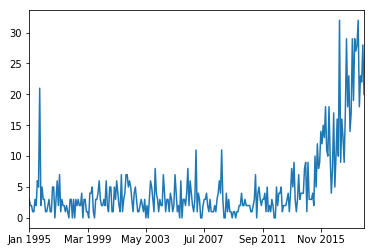

In [65]:
# filter suburb and offence category then plot
marsdenpark_data = crime_suburb_data[:][(crime_suburb_data["Suburb"] == "Marsden Park") &
                                        (crime_suburb_data["Offence category"] == "Theft")]
total_crimes_timeseries = marsdenpark_data.drop(["Suburb", "Offence category", "Subcategory"],axis = 1).sum()
total_crimes_timeseries.plot()